Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

EDA

In [2]:
Airline=pd.read_excel('https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/Forecasting/Airlines%2BData.xlsx')
Airline

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
Airline.shape

(96, 2)

In [4]:
Airline.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [5]:
Airline.isna().sum()

Month         0
Passengers    0
dtype: int64

In [6]:
Airline.duplicated().sum()

0

Visualisations

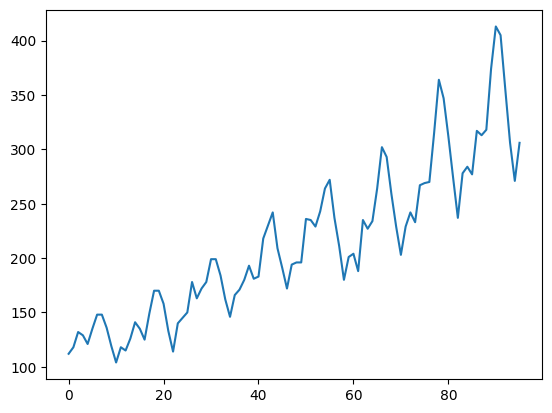

In [7]:
Airline.Passengers.plot()
plt.show()

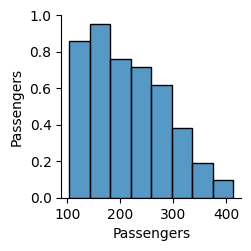

In [8]:
sns.pairplot(Airline)
plt.show()

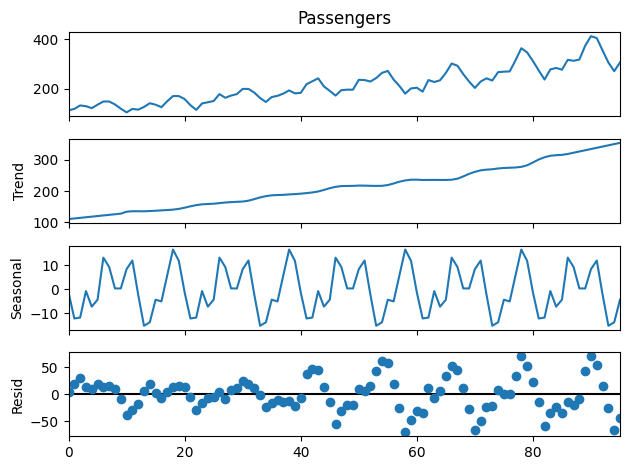

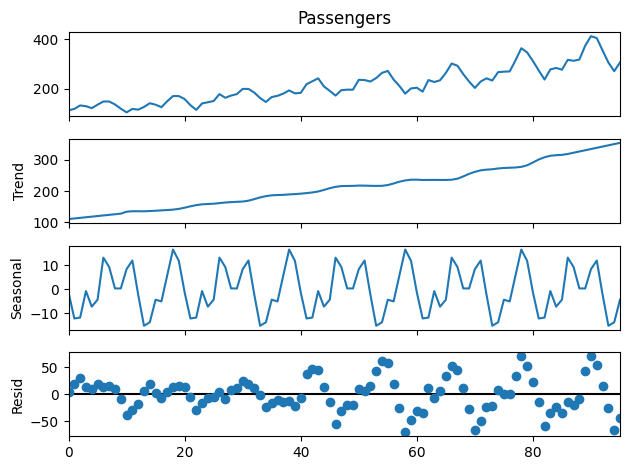

In [9]:
import statsmodels.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_ts_add=smf.tsa.seasonal_decompose(Airline['Passengers'],extrapolate_trend="freq",period=20)
seasonal_ts_add.plot()

<Axes: >

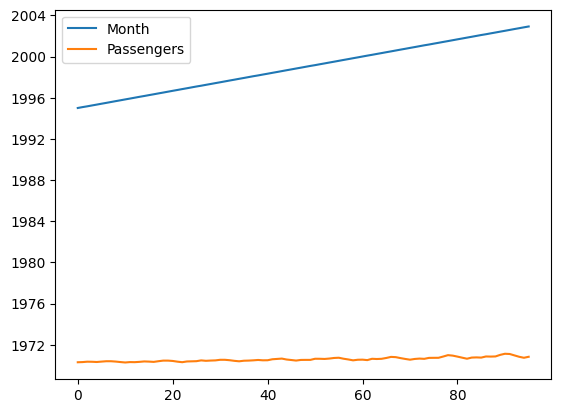

In [10]:
Airline.plot()

array([[<Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Passengers'}>]], dtype=object)

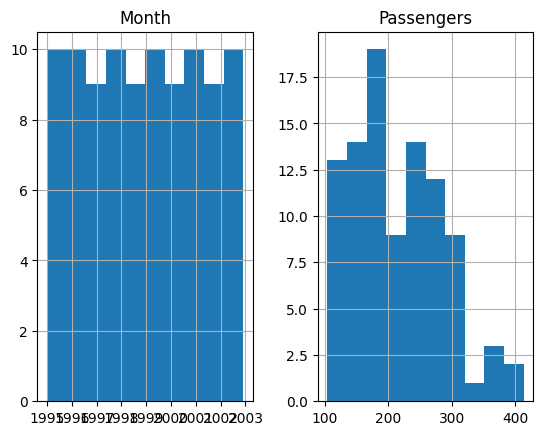

In [11]:
Airline.hist()

Feature Engineering

In [12]:
Airline["Date"]=pd.to_datetime(Airline.Month,format="%b-%y")
Airline["Date"]

0    1995-01-01
1    1995-02-01
2    1995-03-01
3    1995-04-01
4    1995-05-01
        ...    
91   2002-08-01
92   2002-09-01
93   2002-10-01
94   2002-11-01
95   2002-12-01
Name: Date, Length: 96, dtype: datetime64[ns]

In [13]:
Airline["Month"]=Airline.Date.dt.strftime("%b")
Airline["Year"]=Airline.Date.dt.strftime("%y")
Airline["Month"]

0     Jan
1     Feb
2     Mar
3     Apr
4     May
     ... 
91    Aug
92    Sep
93    Oct
94    Nov
95    Dec
Name: Month, Length: 96, dtype: object

In [14]:
Airline["Year"]

0     95
1     95
2     95
3     95
4     95
      ..
91    02
92    02
93    02
94    02
95    02
Name: Year, Length: 96, dtype: object

In [15]:
Airline

,Month,Passengers,Date,Year
0,Jan,112,1995-01-01,95
1,Feb,118,1995-02-01,95
2,Mar,132,1995-03-01,95
3,Apr,129,1995-04-01,95
4,May,121,1995-05-01,95
...,...,...,...,...
91,Aug,405,2002-08-01,02
92,Sep,355,2002-09-01,02
93,Oct,306,2002-10-01,02
94,Nov,271,2002-11-01,02


Heatmap

<Axes: xlabel='Month', ylabel='Year'>

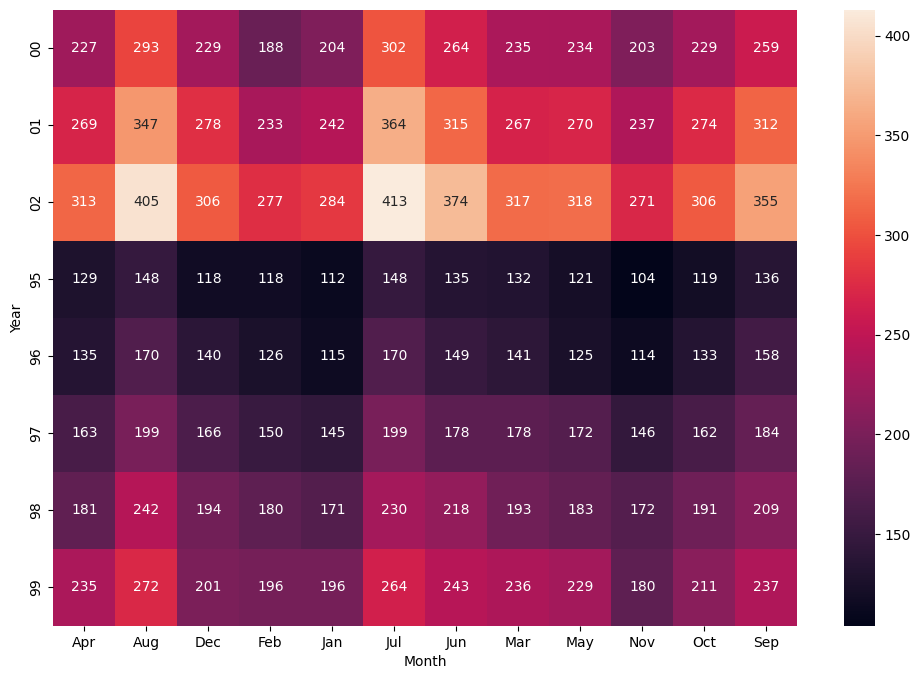

In [16]:
plt.figure(figsize = (12,8))
heatmap_y_Month = pd.pivot_table(data = Airline,values = "Passengers",index = "Year",columns = "Month",fill_value = 0)
sns.heatmap(heatmap_y_Month,annot = True , fmt = "g")

Boxplots

<Axes: xlabel='Month', ylabel='Passengers'>

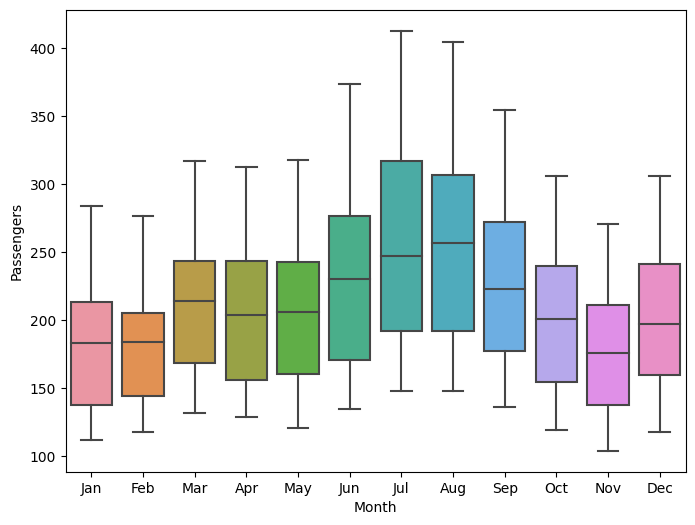

In [17]:
plt.figure(figsize = (8,6))
sns.boxplot(x = "Month",y = "Passengers",data = Airline)

<Axes: xlabel='Year', ylabel='Passengers'>

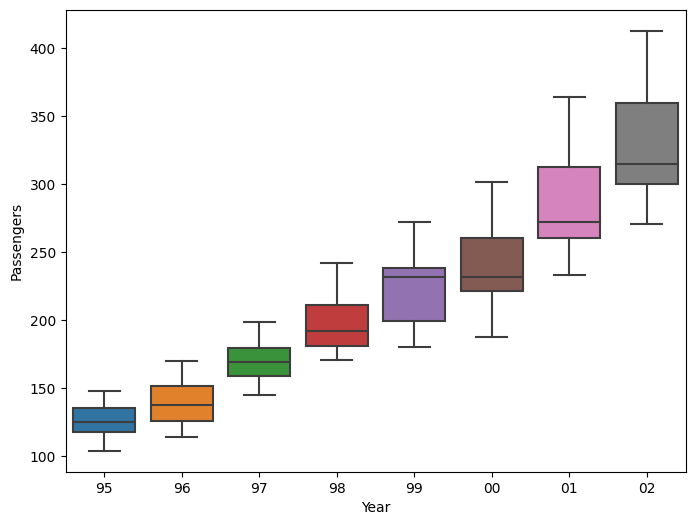

In [18]:
plt.figure(figsize = (8,6))
sns.boxplot(x = "Year",y = "Passengers",data = Airline)

Dummies

In [19]:
month =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
p = Airline["Month"][0]
p[0:8]
Airline['month']= 0

for i in range(96):
    p = Airline["Month"][i]
    Airline['Month'][i]= p[0:3]

In [20]:
month_dummies=pd.DataFrame(pd.get_dummies(Airline["Month"]))
month_dummies

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [21]:
df1=pd.concat([Airline,month_dummies],axis=1)
df1

,Month,Passengers,Date,Year,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Jan,112,1995-01-01,95,0,0,0,0,0,1,0,0,0,0,0,0,0
1,Feb,118,1995-02-01,95,0,0,0,0,1,0,0,0,0,0,0,0,0
2,Mar,132,1995-03-01,95,0,0,0,0,0,0,0,0,1,0,0,0,0
3,Apr,129,1995-04-01,95,0,1,0,0,0,0,0,0,0,0,0,0,0
4,May,121,1995-05-01,95,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Aug,405,2002-08-01,02,0,0,1,0,0,0,0,0,0,0,0,0,0
92,Sep,355,2002-09-01,02,0,0,0,0,0,0,0,0,0,0,0,0,1
93,Oct,306,2002-10-01,02,0,0,0,0,0,0,0,0,0,0,0,1,0
94,Nov,271,2002-11-01,02,0,0,0,0,0,0,0,0,0,0,1,0,0


<Axes: >

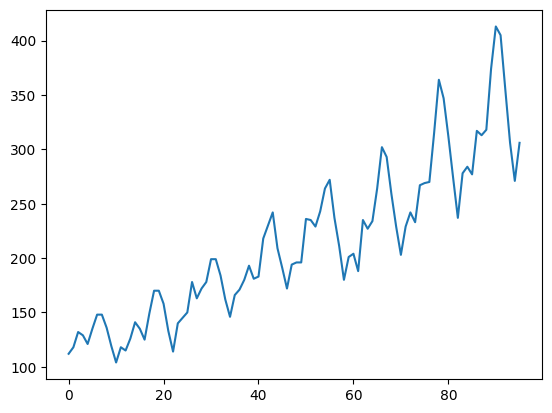

In [22]:
Airline["t"] = np.arange(1,97)
Airline["t_squared"] = Airline["t"]*Airline["t"]
Airline.columns
Airline["log_Passengers"] = np.log(Airline["Passengers"])
Airline.rename(columns={"Passengers ": 'Passengers'}, inplace=True)
Airline.Passengers.plot()

,Month,Passengers,Date,Year,month,t,t_squared,log_Passengers
0,Jan,112,1995-01-01,95,0,1,1,4.718499
1,Feb,118,1995-02-01,95,0,2,4,4.770685
2,Mar,132,1995-03-01,95,0,3,9,4.882802
3,Apr,129,1995-04-01,95,0,4,16,4.859812
4,May,121,1995-05-01,95,0,5,25,4.795791
...,...,...,...,...,...,...,...,...
91,Aug,405,2002-08-01,02,0,92,8464,6.003887
92,Sep,355,2002-09-01,02,0,93,8649,5.872118
93,Oct,306,2002-10-01,02,0,94,8836,5.723585
94,Nov,271,2002-11-01,02,0,95,9025,5.602119


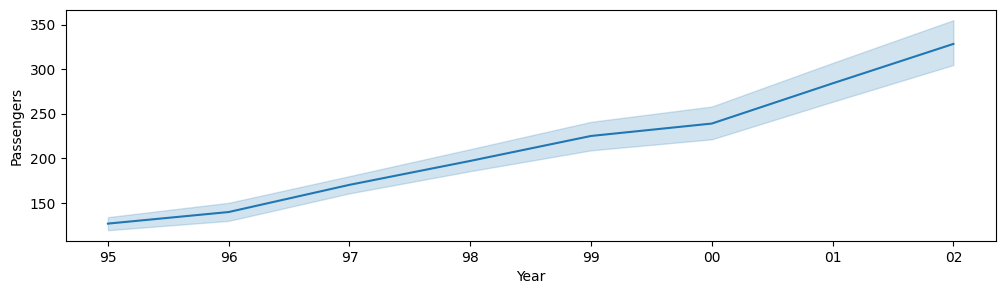

In [23]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Year",y="Passengers",data=Airline)
Airline

Splitting Data

In [24]:
Train = Airline.head(84)
Test = Airline.tail(12)

Model Building

Linear Model

In [25]:
import statsmodels.formula.api as smf
linear_model = smf.ols("Passengers~t",data = Train).fit()

In [26]:
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(Test["t"])))
pred_linear

84    288.419679
85    290.562607
86    292.705535
87    294.848463
88    296.991391
89    299.134319
90    301.277247
91    303.420175
92    305.563103
93    307.706031
94    309.848959
95    311.991887
dtype: float64

In [27]:
rmse_linear=np.sqrt(np.mean((np.array(Test["Passengers"])-np.array(pred_linear))**2))
rmse_linear

53.19923653480278

Exponential Model

In [28]:
Exp = smf.ols("log_Passengers~t",data = Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test["t"])))
pred_Exp

84    5.712637
85    5.723724
86    5.734811
87    5.745897
88    5.756984
89    5.768071
90    5.779158
91    5.790245
92    5.801331
93    5.812418
94    5.823505
95    5.834592
dtype: float64

In [29]:
rmse_Exp = np.sqrt(np.mean((np.array(Test["Passengers"]-np.array(np.exp(pred_Exp)))**2)))
rmse_Exp

46.05736110315654

Quadratic Model

In [30]:
Quad = smf.ols("Passengers~t+t_squared",data = Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean(np.array(Test["Passengers"])-np.array(pred_Quad))**2)
rmse_Quad

15.978663302622044

Additive Seasonality

In [32]:
add_sea = smf.ols("Passengers~Month",data = Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
print("RMSE Additive Seasonality: ",rmse_add_sea)


RMSE Additive Seasonality:  132.81978481421814


Additive Seaonality with Quadratic Trend

In [33]:
add_sea_quad=smf.ols("Passengers~t+t_squared+Month",data=Train).fit()
pred_add_sea_quad=pd.Series(add_sea_quad.predict(Test))
rmse_add_sea_quad=np.sqrt(np.mean((np.array(Test["Passengers"])-np.array(pred_add_sea_quad))**2))
print("RMSE Addditive Seasonality: ",rmse_add_sea_quad)

RMSE Addditive Seasonality:  26.36081761206829


Multiplicative Seaonality




In [34]:
mul_sea=smf.ols('log_Passengers~t+Month',data=Train).fit()
pred_mul_sea=pd.Series(mul_sea.predict(Test))
rmse_mul_sea=np.sqrt(np.mean((np.array(Test['Passengers'])-
                                  np.array(np.exp(pred_mul_sea)))**2))
print("RMSE Multiplicative Seasonality: ",rmse_mul_sea)

RMSE Multiplicative Seasonality:  10.519172544324038


Table of Rmse values

In [35]:
# Creating table of RMSE values
data1 = {"MODEL":pd.Series(["RMSE Linear","RMSE Exponential","RMSE Quadratic","RMSE Additive Seasonality","RMSE Additive Seasonality Quadratic","RMSE Multiplicative Seasonality"]),
         "RMSE Value":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_mul_sea])}

table_rmse =pd.DataFrame(data1)
table_rmse

,MODEL,RMSE Value
0,RMSE Linear,53.199237
1,RMSE Exponential,46.057361
2,RMSE Quadratic,15.978663
3,RMSE Additive Seasonality,132.819785
4,RMSE Additive Seasonality Quadratic,26.360818
5,RMSE Multiplicative Seasonality,10.519173


Predictions

In [36]:
# Forecasting using Multiplicative Seaonality Quadratic Model
model_full=smf.ols('log_Passengers~t+Month',data=Train).fit()
pred_new=pd.Series(mul_sea.predict(Test.head(10)))
pred_new

84    5.632141
85    5.647734
86    5.792098
87    5.756366
88    5.746648
89    5.865009
90    5.972273
91    5.972648
92    5.865485
93    5.738005
dtype: float64